In [19]:
from gaussian_kde.gaussian_kde import gaussian_kde
from scipy.stats import multivariate_normal
import scipy
import numpy as np

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


# Gaussian KDE Conditional Distributions

First, generate a test distribution.

In [20]:
def banana_distribution(N=10000):
    """
    This generates random points in a banana shape
    """
    # create a truncated normal distribution
    theta = np.random.normal(0, np.pi / 8, 10000)
    theta[theta >= np.pi / 4] /= 2
    theta[theta <= -np.pi / 4] /= 2
    
    # define the curve parametrically
    r = np.sqrt(1. / abs(np.cos(theta) ** 2 - np.sin(theta) ** 2))
    r += np.random.normal(0, 0.08, size=10000)
    x = r * np.cos(theta + np.pi / 4)
    y = r * np.sin(theta + np.pi / 4)
    
    return (x, y)

# randomly sample from the distribution
np.random.seed(1)
x, y = banana_distribution(10000)

In [23]:
values = np.vstack([x,y])
kernel_1 = scipy.stats.gaussian_kde(values)
kernel_2 = gaussian_kde(values)

In [ ]:
X, Y = np.mgrid[0:2:100j, 0:2:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

In [ ]:
kernel_2.marginalized_multivariate_normal

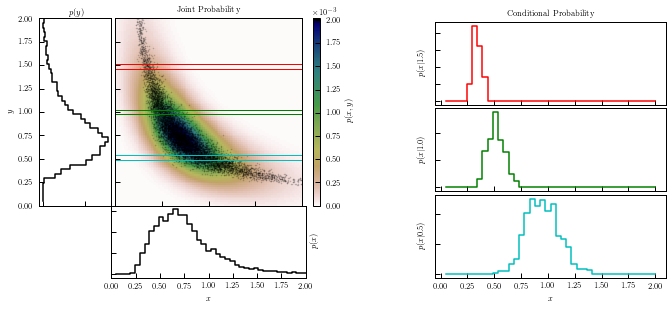

In [29]:
# plot the result
fig = plt.figure(figsize=(10, 5))

# define axes
ax_Pxy = plt.axes((0.2, 0.34, 0.27, 0.52))
ax_Px = plt.axes((0.2, 0.14, 0.27, 0.2))
ax_Py = plt.axes((0.1, 0.34, 0.1, 0.52))
ax_cb = plt.axes((0.48, 0.34, 0.01, 0.52))
ax_Px_y = [plt.axes((0.65, 0.62, 0.32, 0.23)),
           plt.axes((0.65, 0.38, 0.32, 0.23)),
           plt.axes((0.65, 0.14, 0.32, 0.23))]

# set axis label formatters
ax_Px_y[0].xaxis.set_major_formatter(NullFormatter())
ax_Px_y[1].xaxis.set_major_formatter(NullFormatter())

ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())

ax_Px.yaxis.set_major_formatter(NullFormatter())
ax_Py.xaxis.set_major_formatter(NullFormatter())

# draw the joint probability
plt.axes(ax_Pxy)
H *= 1000
plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
plt.plot(x, y, 'k.', markersize=1, alpha=0.2)
cb = plt.colorbar(cax=ax_cb)
cb.set_label('$p(x, y)$')
plt.text(0, 1.02, r'$\times 10^{-3}$',
         transform=ax_cb.transAxes)

# draw p(x) distribution
ax_Px.plot(xbins[1:], H.sum(0), '-k', drawstyle='steps')

# draw p(y) distribution
ax_Py.plot(H.sum(1), ybins[1:], '-k', drawstyle='steps')

# define axis limits
ax_Pxy.set_xlim(0, 2)
ax_Pxy.set_ylim(0, 2)
ax_Px.set_xlim(0, 2)
ax_Py.set_ylim(0, 2)

# label axes
ax_Pxy.set_xlabel('$x$')
ax_Pxy.set_ylabel('$y$')
ax_Px.set_xlabel('$x$')
ax_Px.set_ylabel('$p(x)$')
ax_Px.yaxis.set_label_position('right')
ax_Py.set_ylabel('$y$')
ax_Py.set_xlabel('$p(y)$')
ax_Py.xaxis.set_label_position('top')


# draw marginal probabilities
iy = [3 * Ngrid / 4, Ngrid / 2, Ngrid / 4]
colors = 'rgc'
axis = ax_Pxy.axis()
for i in range(3):
    # overplot range on joint probability
    ax_Pxy.plot([0, 2, 2, 0],
                [ybins[iy[i] + 1], ybins[iy[i] + 1],
                 ybins[iy[i]], ybins[iy[i]]], c=colors[i], lw=1)
    Px_y = H[iy[i]] / H[iy[i]].sum()
    ax_Px_y[i].plot(xbins[1:], Px_y, drawstyle='steps', c=colors[i])
    ax_Px_y[i].yaxis.set_major_formatter(NullFormatter())
    ax_Px_y[i].set_ylabel('$p(x | %.1f)$' % ybins[iy[i]])
ax_Pxy.axis(axis)

ax_Px_y[2].set_xlabel('$x$')

ax_Pxy.set_title('Joint Probability')
ax_Px_y[0].set_title('Conditional Probability')

plt.show()

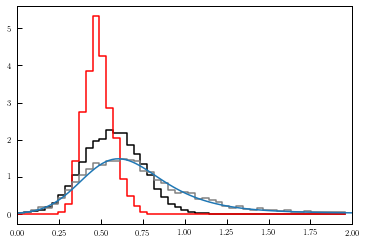

In [18]:
cxs = [1.0]
c = np.array([True, False])
kde.conditional_resample(cxs[0], c, size=100)

ysample = np.linspace(0,2,100)
l = np.zeros(100)
for i, y in enumerate(ysample):
    l[i] = np.sum([p.pdf(y)/kde.n for p in kde.cdists])

for cx in cxs:
    s = kde.conditional_resample(cx, c, size=10000)
    bins = np.linspace(0,2,50)
    counts = np.histogram(s, bins=bins)[0]

    counts = 1.0*counts/np.sum(counts)/np.diff(bins)
    plt.step(bins[:-1], counts, '-', color='black')
    
    dx = 0.1
    mask = (values[0,:]>(cx-dx)) & (values[0,:]<(cx+dx))
    counts = np.histogram(values[1,mask], bins=bins)[0]
    counts = 1.0*counts/np.sum(counts)/np.diff(bins)
    plt.step(bins[:-1], counts, '-', color='red')
    
    counts = np.histogram(values[1,:], bins=bins)[0]
    counts = 1.0*counts/np.sum(counts)/np.diff(bins)
    plt.step(bins[:-1], counts, '-', color='grey')
    
    plt.plot(ysample, l)
    plt.xlim([0,2])
    
plt.show()

In [12]:
l

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   5.79652978e-293,   2.26524768e-291,
         5.24211606e-257,   1.01283357e-220,   5.30349963e-175,
         2.04593864e-167,   3.29079833e-151,   9.20377795e-146,
         1.29721423e-136,   6.63800437e-131,   3.51142616e-127,
         5.07444361e-127,   4.58806474e-126,   6.55029608e-126,
         5.37963526e-111,   5.14973156e-109,   5.13248023e-106,
         6.65025235e-104,   6.80868049e-100,   8.45754177e-100,
         1.38427353e-095,   1.89182864e-095,   6.93934816e-089,
         1.85223118e-077,   7.40405282e-077,   1.35037166e-069,
         1.44347967e-068,   3.19112426e-067,   3.68419244e-067,
         5.29271973e-067,   3.81161076e-065,   4.01874078e-059,
         4.78452851e-055,   8.67715596e-